## Usage Case: Toy Field Grid (Minimal Real-World Example)

What this shows (in plain language):
We define a rectangular land area (“field”), split it into regular grid cells, assign a synthetic spatial value to each cell, and visualize it as a map.
This mimics how rasters are used in geospatial, agriculture, radar, and imaging contexts — without committing to any domain.

Author: Maria B. Stone

# Light-GG Tutorial 01: Toy Field Grid

This tutorial demonstrates how to use **Light-GG** to construct a
memory-efficient 2D grid using 1D axes and NumPy broadcasting.

The example represents a simple rectangular “field” with a synthetic
spatial pattern.  
Units are **intentionally abstract** (meters, pixels, degrees, etc.).


## Setup

Before running this notebook, making sure Light-GG is installed
in editable mode from the repository root:

```bash
python -m pip install -e .



---

### **Code (Environment sanity check)**

```python
import sys
print(sys.executable)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from lightgg_functions import make_axes_from_reference


## 1. Define a rectangular field

We define a field by specifying:
- a reference point (origin)
- total width and height
- grid resolution (step size)


In [6]:
# Grid construction

field_width = 600.0
field_height = 400.0
cell_size = 10.0

vector_x, vector_y = make_axes_from_reference(
    x_reference=0.0,
    y_reference=0.0,
    span_x=field_width,
    span_y=field_height,
    step=cell_size,
)

# Broadcasted coordinate views (no full 2D mesh allocated elsewhere)
X = vector_x[None, :]
Y = vector_y[:, None]

vector_x.shape, vector_y.shape


((60,), (40,))

## 2. Create a toy spatial pattern

This pattern has:
- a smooth central peak
- a gentle gradient
- small random noise

It is purely illustrative.


In [7]:
# Toy field values

value = (
    1.5 * np.exp(-((X - 300.0)**2 + (Y - 200.0)**2) / (2 * 120.0**2))
    + 0.002 * X
    + 0.001 * Y
    + 0.15 * np.random.default_rng(3).normal(size=X.shape)
)


## 3. Visualize the field

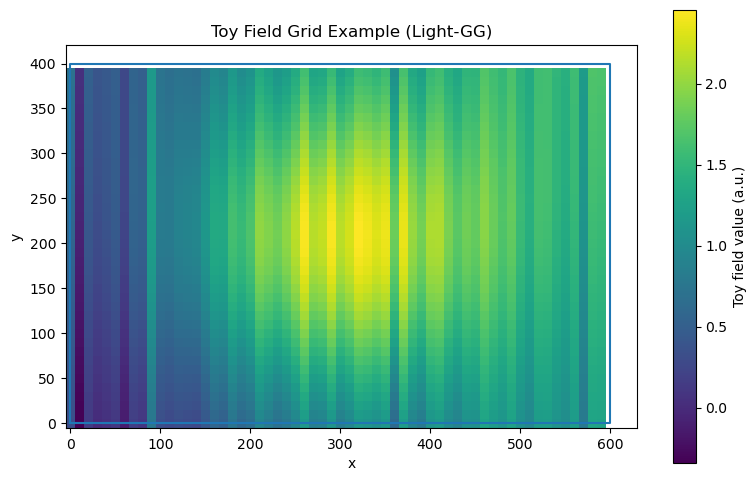

In [8]:
# plotting

extent = (
    vector_x[0] - cell_size / 2,
    vector_x[-1] + cell_size / 2,
    vector_y[0] - cell_size / 2,
    vector_y[-1] + cell_size / 2,
)

plt.figure(figsize=(8, 5))
im = plt.imshow(
    value,
    origin="lower",
    extent=extent,
    aspect="equal",
)
plt.colorbar(im, label="Toy field value (a.u.)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Toy Field Grid Example (Light-GG)")

# Field boundary
plt.plot(
    [0, field_width, field_width, 0, 0],
    [0, 0, field_height, field_height, 0],
    linewidth=1.5,
)

plt.tight_layout()
plt.show()


In [1]:
## when using meters for more real-world example

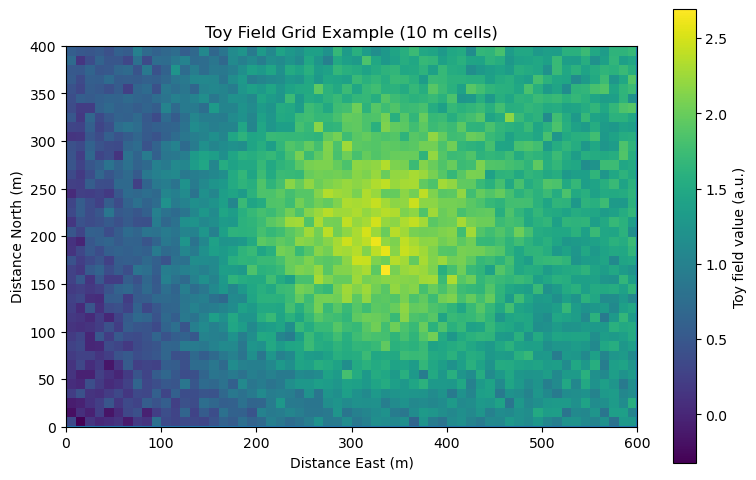

In [4]:
# -------------------------------------------------
# 1. Define a rectangular "field" in meters
# -------------------------------------------------
field_width = 600.0   # meters (east–west)
field_height = 400.0  # meters (north–south)
cell_size = 10.0      # grid resolution (meters)

# 1D grid axes (cell edges)
x = np.arange(0, field_width, cell_size)
y = np.arange(0, field_height, cell_size)

# Cell centers (1D axes only)
xc = x + cell_size / 2
yc = y + cell_size / 2

# -------------------------------------------------
# 2. Create a toy spatial pattern
#    (no real science – purely illustrative)
# -------------------------------------------------
X, Y = np.meshgrid(xc, yc, indexing="xy")

# Smooth "hill" + gentle gradient + noise
value = (
    1.5 * np.exp(-((X - 300)**2 + (Y - 200)**2) / (2 * 120**2)) +
    0.002 * X +
    0.001 * Y +
    0.15 * np.random.default_rng(3).normal(size=X.shape)
)

# -------------------------------------------------
# 3. Plot (human-friendly visualization)
# -------------------------------------------------
plt.figure(figsize=(8, 5))
im = plt.imshow(
    value,
    origin="lower",
    extent=[0, field_width, 0, field_height],
    aspect="equal"
)
plt.colorbar(im, label="Toy field value (a.u.)")
plt.xlabel("Distance East (m)")
plt.ylabel("Distance North (m)")
plt.title("Toy Field Grid Example (10 m cells)")

# Optional: draw field boundary
plt.plot(
    [0, field_width, field_width, 0, 0],
    [0, 0, field_height, field_height, 0],
)

plt.tight_layout()
plt.show()